#### Importación de bibliotecas

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Conexión a MySQL

In [4]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation'].


C:\Users\sguti\AppData\Local\Temp\ipykernel_14100\3597080797.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"


#### Exploración inicial

In [5]:
df = Tourist_Accommodation
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


##### Tamaño

In [6]:
df.shape

(10000, 35)

##### Tipos de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   name                         9997 non-null   object 
 2   description                  9862 non-null   object 
 3   host_id                      10000 non-null  int64  
 4   neighbourhood_name           10000 non-null  object 
 5   neighbourhood_district       6079 non-null   object 
 6   room_type                    10000 non-null  object 
 7   accommodates                 10000 non-null  int64  
 8   bathrooms                    9926 non-null   object 
 9   bedrooms                     9930 non-null   object 
 10  beds                         9955 non-null   float64
 11  amenities_list               9983 non-null   object 
 12  price                        9746 non-null   float64
 13  minimum_nights   

##### Valores nulos

In [8]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

##### Duplicados

In [9]:
df.duplicated().sum()

np.int64(0)

##### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
beds                            2.92                 2.26     0.0       1.0      2.0       4.0     30.0
price                        1021.37               974.85    60.0     450.0    750.0    1240.0  28571.0
minimum_nights                  4.95                17.73     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.77               498.37     1.0      62.0   1125.0    1125.0   1125.0
availability_30                13.01                11.84     0.0       0.0     11.0      26.0     30.0
availability_60                28.76                22.97     0.0       2.0     29.0      53.0     60.0
availability_90                46.11                33.75     0.0      10.0     49.0      80.0     90.0
availability_365           

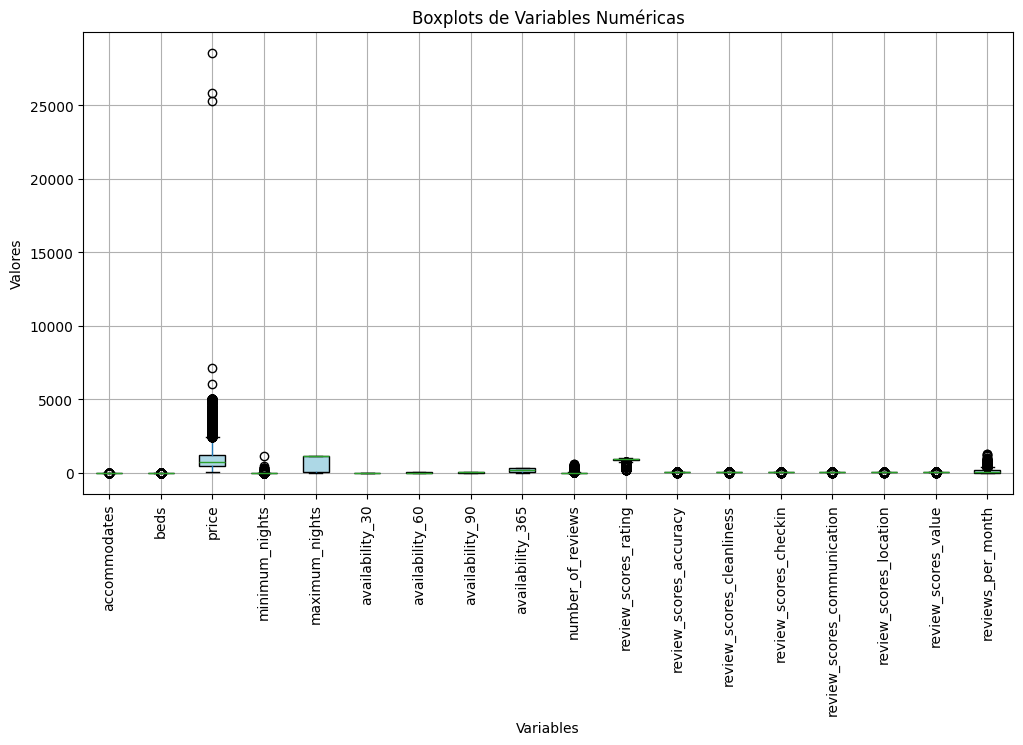

In [10]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

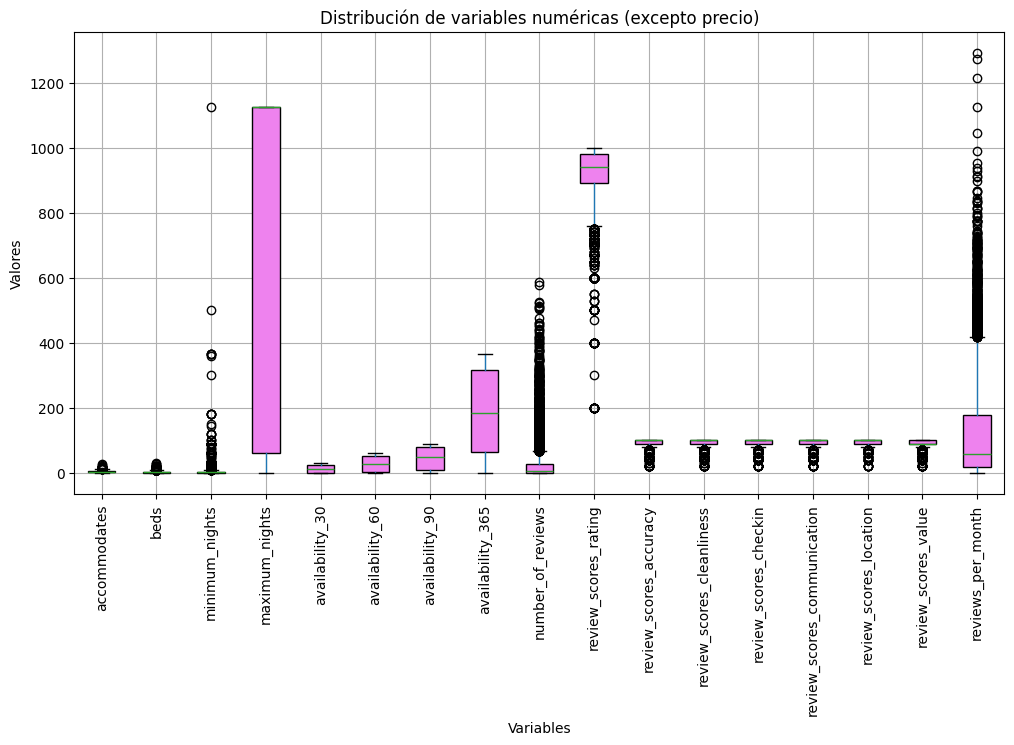

In [11]:
# nuevo gráfico para poder ver mejor las distribuciones

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

#### 3. Limpieza de datos (Data Cleaning)

##### Tratamiento de duplicados

In [12]:
# Verificar los apartment_id duplicados
duplicados = df['apartment_id'].duplicated().sum()

print(f"El número de apartment_id duplicados es: {duplicados}")

El número de apartment_id duplicados es: 350


In [13]:
# Filtrr las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,1.0,"Wireless Internet,Wheelchair accessible,Elevat...",470.0,2,365,VERDADERO,22,52,82,357,32,04/07/2011,04/08/2016,870.0,80.0,90.0,90.0,90.0,90.0,80.0,FALSO,42.0,spain,barcelona,12/09/2017
23,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,1.0,"Wifi,Wheelchair accessible,Elevator,Heating,Fa...",490.0,2,365,VERDADERO,19,49,79,354,34,04/07/2011,15/08/2018,880.0,80.0,90.0,90.0,90.0,90.0,80.0,FALSO,38.0,spain,barcelona,10/10/2018
24,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,8.0,"TV,Air conditioning,Pool,Kitchen,Free parking ...",NaN,7,90,VERDADERO,27,57,87,362,1,18/08/2015,18/08/2015,800.0,80.0,100.0,100.0,100.0,80.0,80.0,FALSO,2.0,spain,girona,30/04/2020
25,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,8.0,"TV,Air conditioning,Pool,Kitchen,Free parking ...",5000.0,7,60,VERDADERO,26,56,86,361,1,18/08/2015,18/08/2015,800.0,80.0,100.0,100.0,100.0,80.0,80.0,FALSO,3.0,spain,girona,30/08/2018
50,343864,3 BD APT IN THE HEART OF GRACIA,A spacious and comfortable 3 bedrooms apartmen...,1744516,la Vila de Gr�cia,Gr�cia,Entire home/apt,6,2,3,5.0,"TV,Wireless Internet,Kitchen,Buzzer/wireless i...",1390.0,2,1125,None,9,28,58,333,4,17/06/2014,07/03/2017,950.0,100.0,100.0,100.0,90.0,100.0,90.0,FALSO,11.0,spain,barcelona,05/06/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,42922000,Hostal Bruselas Hab. #7 con ba�o privado y balc�n,Hostal Bruselas se encuentra en el Centro de M...,335917627,Centro,None,Private room,2,1,1,1.0,"Breakfast, Essentials, Hangers, Shampoo, Wifi,...",360.0,2,1125,VERDADERO,30,60,90,90,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,malaga,30/11/2020
9788,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3,2,3.0,"TV,Wifi,Air conditioning,Kitchen,Heating,Washe...",1070.0,30,1125,VERDADERO,30,60,90,365,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,17/04/2020
9789,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3,2,3.0,"Iron, TV, Hangers, Smoke alarm, Heating, Air c...",1080.0,30,1125,VERDADERO,30,60,90,365,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,06/11/2020
9852,43897607,Finca rural Els Ametllers,Hermosa Villa rural en Finca de almendros y ol...,351241882,Inca,None,Entire home/apt,8,2,3,5.0,"Smoke alarm, Oven, Extra pillows and blankets,...",1820.0,5,1125,VERDADERO,23,53,83,323,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,mallorca,19/09/2020


In [14]:
def resolver_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo, elimina el más reciente,
    pero antes completa los valores faltantes del antiguo con los valores del más reciente.
    Devuelve el df sin duplicados y un resumen de los cambios
    """

    df = df.copy()  # para no modificar el df original
    resumen = []

    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena por fecha
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores vacíos
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si se actualizó, se guarda
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro eliminado": latest_index,
                    "columnas actualizadas": actualizacion
                })

            # eliminar el registro reciente
            df.drop(index=latest_index, inplace=True)

    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df_sin_duplicados, duplicados_borrados = resolver_duplicados(df, id_col='apartment_id', date_col='insert_date')

In [15]:
pd.set_option('display.max_colwidth', None)
duplicados_borrados

,ID,índice del registro antiguo,índice del registro eliminado,columnas actualizadas
0,157327,24,25,{'price': 5000.0}
1,343864,50,51,{'has_availability': 'VERDADERO'}
2,1624014,471,470,{'has_availability': 'VERDADERO'}
3,1895368,515,516,{'has_availability': 'VERDADERO'}
4,2450287,614,615,{'bedrooms': '0'}
5,3163230,759,758,{'has_availability': 'VERDADERO'}
6,3559666,839,838,{'has_availability': 'VERDADERO'}
7,3770072,879,878,{'has_availability': 'VERDADERO'}
8,5080749,1087,1088,"{'first_review_date': '27/10/2018', 'last_review_date': '06/05/2019', 'review_scores_rating': 900.0, 'review_scores_accuracy': 90.0, 'review_scores_cleanliness': 100.0, 'review_scores_checkin': 100.0, 'review_scores_communication': 100.0, 'review_scores_location': 100.0, 'review_scores_value': 90.0, 'reviews_per_month': 1.0}"
9,5121791,1096,1095,{'amenities_list': ']'}


In [16]:
conteo_duplicados = df["apartment_id"].value_counts()
duplicados = conteo_duplicados[conteo_duplicados > 1]
duplicados

apartment_id
14582385    3
10005342    3
10713417    3
13966456    3
14326808    3
           ..
43193627    2
43897607    2
144471      2
157327      2
343864      2
Name: count, Length: 342, dtype: int64

##### Tratamiento de nulos

In [17]:
# valores nulos
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

In [18]:
# Eliminar columnas 'description'
df = df.drop(columns=['description'])

In [19]:
# Análisis de nulos de reviews_per_month

df_nulos = df[df['reviews_per_month'].isna()]
df_nulos[['reviews_per_month','number_of_reviews']].tail(10)

,reviews_per_month,number_of_reviews
9988,NaN,0
9990,NaN,0
9991,NaN,0
9992,NaN,0
9994,NaN,0
9995,NaN,0
9996,NaN,0
9997,NaN,0
9998,NaN,0
9999,NaN,0


Se observa que la mayoría de los valores nulos en reviews_per_month están justificados, ya que corresponden a alojamientos que no han recibido ninguna reseña.

In [20]:
# Averiguar si hay algún valor nulo con reseña
print((df_nulos['number_of_reviews'] > 0).any())

True


In [21]:
# Crear tabla de aquellos nulos con reseñas
df_nulos_filtrados = df_nulos[df_nulos['number_of_reviews'] > 0]
df_nulos_filtrados[['name', 'number_of_reviews', 'reviews_per_month']]

,name,number_of_reviews,reviews_per_month
4985,Club Villamar - Gomez,1,NaN
5213,Single room luminous Sagrada Familia WIFI new Flat,1,NaN
6393,Habitacion para disfrutar un descanso confortable.,1,NaN


Existen 3 alojamientos que tienen 1 review, pero presentan valores nulos en reviews_per_month.

In [22]:
# Analisis del resto de columnas de reviews

# Seleccionar solo las columnas de interés
cols_reviews = [
    'first_review_date', 'last_review_date', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Filtrar filas donde TODAS las columnas están nulas
df_todas_nulas = df[df[cols_reviews].isnull().all(axis=1)]

# Filtrar filas donde ALGUNA columna está nula, pero no todas
df_parcialmente_nulas = df[df[cols_reviews].isnull().any(axis=1) & ~df[cols_reviews].isnull().all(axis=1)]

# Mostrar el número de filas en cada caso
print(f"Filas con nulos en TODAS las columnas: {len(df_todas_nulas)}")
print(f"Filas con nulos en ALGUNAS columnas, pero no en todas: {len(df_parcialmente_nulas)}")

Filas con nulos en TODAS las columnas: 2603
Filas con nulos en ALGUNAS columnas, pero no en todas: 128


La mayoría de los valores nulos se repiten en todas las columnas, con un total de 2603 filas completamente nulas, mientras que solo 128 filas presentan nulos en algunas columnas.

In [23]:
# Verificar si todas las filas en df_todas_nulas tienen number_of_reviews == 0
todas_nulas_son_cero = (df_todas_nulas['number_of_reviews'] == 0).all()

print(f"¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: {todas_nulas_son_cero}")

¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: False


In [24]:
# Substituir los NA por False
df['has_availability'] = df['has_availability'].fillna('FALSO')

In [25]:
df['has_availability'].unique()

array(['VERDADERO', 'FALSO'], dtype=object)

In [26]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

In [27]:
# Reemplazar nulos por 1 en las columnas específicas
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

In [28]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

In [29]:
df['amenities_list'] = df['amenities_list'].fillna()

ValueError: Must specify a fill 'value' or 'method'.

In [30]:
df.isnull().sum()

apartment_id                      0
name                              3
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                   17
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication    2714
review_scores_location      

#### Corrección de tipos de datos

### 4. Transformación de Datos (Data Transformation)

### 5. Reducción de Datos (Data Reduction)

### Exportación del dataset limpio

In [31]:
df.to_csv("../Data/tourist_accommodation_clean.csv", index=False)

OSError: Cannot save file into a non-existent directory: '..\Data'

# EDA MÁRKETING Y ESTRATEGIA COMERCIAL

### Análisis d porcentaje y contaje de tipos de alojamiento por ciudad 

In [ ]:
#contaje de alojamientos por ciudad y tipo de habitación
tipo_alojamiento_distribucion = df.groupby(["city", "room_type"]).size().reset_index(name="count")

#Calculamos el porcentaje:
tipo_alojamiento_distribucion["percentage"] = (
    tipo_alojamiento_distribucion.groupby("city")["count"].transform(lambda x: (x / x.sum()) * 100))

print(tipo_alojamiento_distribucion)

         city        room_type  count  percentage
0   barcelona  Entire home/apt   1292   45.734513
1   barcelona       Hotel room     22    0.778761
2   barcelona     Private room   1479   52.353982
3   barcelona      Shared room     32    1.132743
4      girona  Entire home/apt   1438   93.803001
5      girona       Hotel room     11    0.717547
6      girona     Private room     83    5.414220
7      girona      Shared room      1    0.065232
8      madrid  Entire home/apt   1341   60.899183
9      madrid       Hotel room     14    0.635786
10     madrid     Private room    817   37.102634
11     madrid      Shared room     30    1.362398
12     malaga  Entire home/apt    416   80.000000
13     malaga       Hotel room      4    0.769231
14     malaga     Private room     97   18.653846
15     malaga      Shared room      3    0.576923
16   mallorca  Entire home/apt   1467   89.233577
17   mallorca       Hotel room     18    1.094891
18   mallorca     Private room    155    9.428224


## Precio medio por tipo de alojamiento y ciudad:


In [39]:
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

print(precio_medio)


         city        room_type        price
0   barcelona  Entire home/apt  1245.309598
1   barcelona       Hotel room  1110.000000
2   barcelona     Private room   471.735632
3   barcelona      Shared room   440.625000
4      girona  Entire home/apt  1236.147427
5      girona       Hotel room   672.727273
6      girona     Private room   681.445783
7      girona      Shared room   150.000000
8      madrid  Entire home/apt   986.343773
9      madrid       Hotel room   890.000000
10     madrid     Private room   477.347613
11     madrid      Shared room   623.333333
12     malaga  Entire home/apt   838.221154
13     malaga       Hotel room   622.500000
14     malaga     Private room   370.618557
15     malaga      Shared room   143.333333
16   mallorca  Entire home/apt  1691.384458
17   mallorca       Hotel room  1502.777778
18   mallorca     Private room   879.587097
19   mallorca      Shared room   437.500000
20    menorca  Entire home/apt  1661.182266
21    menorca     Private room  

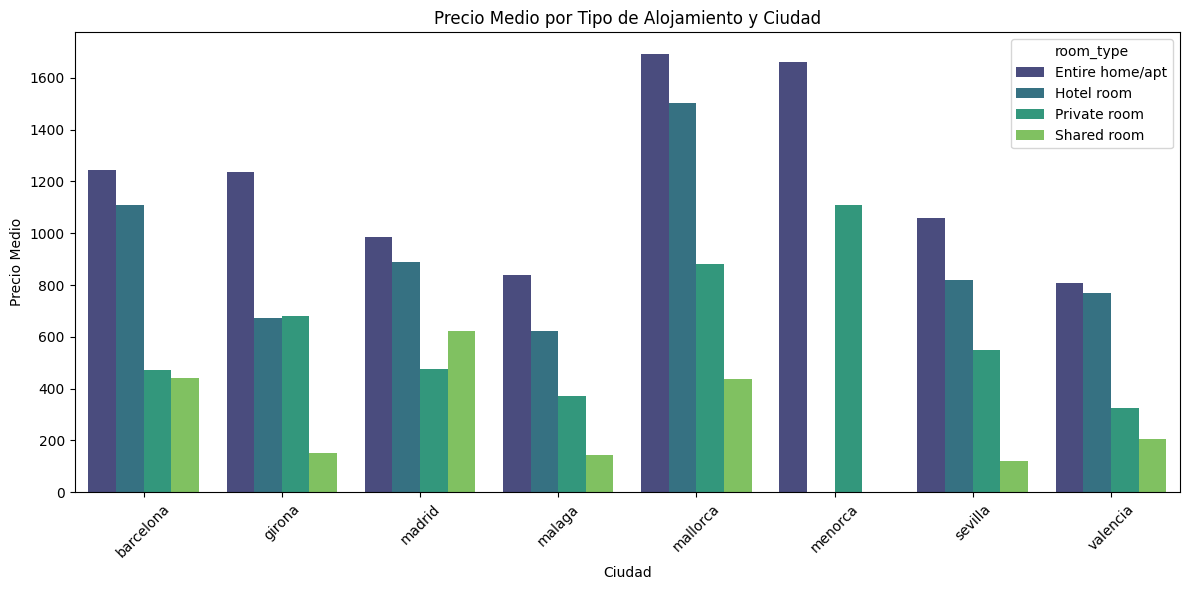

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=precio_medio, x='city', y='price', hue='room_type', palette='viridis')

plt.title('Precio Medio por Tipo de Alojamiento y Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Medio')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

### Identificación de posibles oportunidades: Que ciudades tienen mucha demanda y poca oferta (posible crecimiento)

In [43]:
#Número total de anuncios por ciudad y tipo de alojamiento
oferta = df.groupby(["city", "room_type"])["apartment_id"].count().reset_index()
oferta.rename(columns={"apartment_id": "total_listings"}, inplace=True)

# Calcular la demanda: promedio de disponibilidad y número de reseñas por ciudad y tipo de alojamiento
demanda = df.groupby(["city", "room_type"])[["availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews"]].mean().reset_index()

# Fusionar ambos DataFrames en uno solo
competencia = pd.merge(oferta, demanda, on=["city", "room_type"])

# Calcular la tasa de ocupación como (1 - disponibilidad relativa)
competencia["occupancy_rate"] = (1 - (competencia["availability_30"] / 30)) * 100  # % de ocupación en el último mes

# Ordenar por ciudades con alta ocupación y poca oferta
oportunidades = competencia.sort_values(by=["occupancy_rate", "total_listings"], ascending=[False, True])

# Mostrar las ciudades y tipos de alojamiento con mayor demanda y menor oferta
print(oportunidades[["city", "room_type", "total_listings", "occupancy_rate"]])

         city        room_type  total_listings  occupancy_rate
25    sevilla      Shared room               1      100.000000
15     malaga      Shared room               3       76.666667
17   mallorca       Hotel room              18       71.666667
29   valencia      Shared room               3       66.666667
1   barcelona       Hotel room              22       63.484848
27   valencia       Hotel room               3       63.333333
0   barcelona  Entire home/apt            1292       61.839525
10     madrid     Private room             817       61.623827
8      madrid  Entire home/apt            1341       61.160825
2   barcelona     Private room            1479       59.213432
24    sevilla     Private room             102       58.366013
14     malaga     Private room              97       57.525773
19   mallorca      Shared room               4       57.500000
12     malaga  Entire home/apt             416       57.155449
26   valencia  Entire home/apt             363       56

Este resultado muestra la cantidad total de anuncios (total_listings) y la tasa de ocupación (occupancy_rate) por tipo de alojamiento y ciudad.  

**Interpretación:**
- **Sevilla** tiene solo 1 alojamiento tipo "Shared room", pero está completamente ocupado (100% de ocupación), lo que indica una alta demanda y una oferta limitada.
- **Valencia** tiene varias opciones, pero la tasa de ocupación es algo más baja para los tipos de alojamiento "Shared room" y "Hotel room" (63-66%).
- **Barcelona** tiene la mayor oferta de "Entire home/apt" (1292 listados), pero su ocupación es de un 61.8%, lo que sugiere que aunque hay mucha oferta, la demanda no es tan alta comparada con Sevilla o Mallorca.
- **Madrid** tiene una ocupación moderada, con una oferta significativa de "Entire home/apt" y "Private room".

**Oportunidades:**
- **Sevilla** podría ser una oportunidad para crear más anuncios de "Shared room", dado que la demanda es alta y la oferta es limitada.
- **Mallorca** también tiene una buena ocupación en "Hotel room", lo que podría indicar un mercado competitivo pero con alta demanda.
- **Barcelona** y **Madrid** tienen mucha oferta, pero la tasa de ocupación no es tan alta, lo que sugiere que hay espacio para ajustar precios o mejorar la estrategia de marketing para aumentar la ocupación.

## Desafio 2

¿Qué características de los alojamientos (comodidades, capacidad y puntuación de la zona) están más relacionadas con los precios por ciudad?